In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

user_input = input("Enter your search query: ")

# Yahoo News search
yahoo_url = f"https://news.search.yahoo.com/search?p={user_input}"
yahoo_response = requests.get(yahoo_url)
yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

yahoo_results = []

for i in range(len(yahoo_titles)):
    title = yahoo_titles[i].text.strip()
    summary = yahoo_summaries[i].text.strip()
    yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News"})


# Create dataframe
results = yahoo_results 
df = pd.DataFrame(results)

df.head()


Enter your search query: adani


title  \
0  Adani Power Q4 FY23 results: Net profit soars ...   
1  MSCI slashes free float for 2 Adani firms, her...   
2  28% less than earlier guidance: Adani flagship...   
3  MSCI to mark down free float of two Adani grou...   
4    MSCI to lower free float of two Adani companies   

                                             summary      source  
0  In a regulatory filing, the company said its c...  Yahoo News  
1  After battling the stock market rout triggered...  Yahoo News  
2  Adani’s transportation vertical comprising air...  Yahoo News  
3  MSCI now assesses Adani Total Gas' free float ...  Yahoo News  
4  (Reuters) - MSCI will lower the free float of ...  Yahoo News

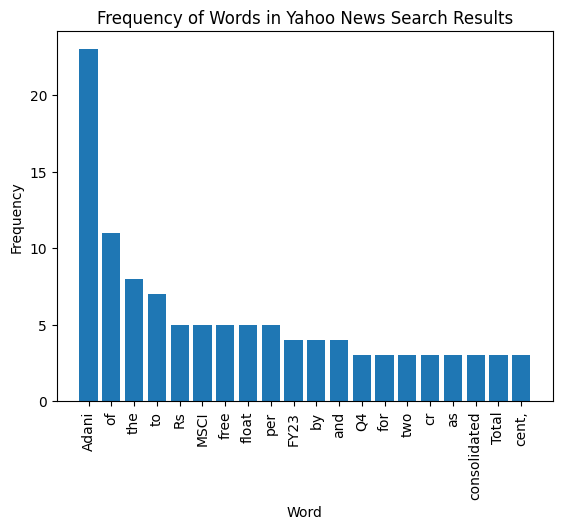

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

# Join all titles and summaries into a single string
text = " ".join(df["title"].tolist() + df["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter your search query: adani


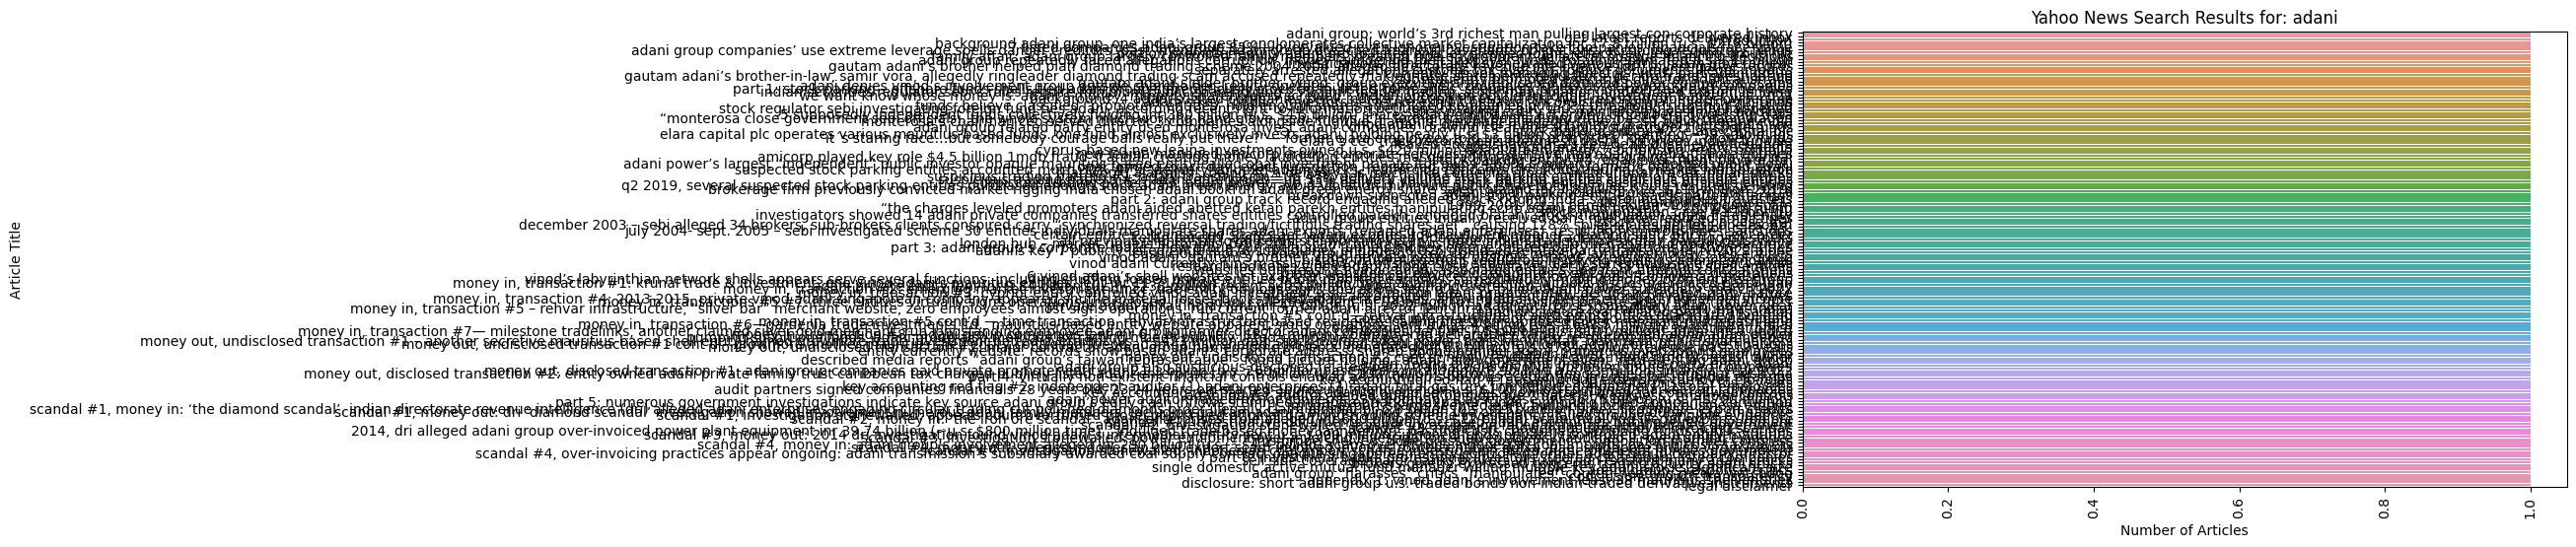

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

user_input = input("Enter your search query: ")

# Yahoo News search
yahoo_url = f"https://news.search.yahoo.com/search?p={user_input}"
yahoo_response = requests.get(yahoo_url)
yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

yahoo_results = []

# Remove stop words from titles and summaries
stop_words = set(stopwords.words('english'))
for i in range(len(yahoo_titles)):
    title = yahoo_titles[i].text.strip()
    summary = yahoo_summaries[i].text.strip()

    title_words = title.split()
    title = " ".join([word for word in title_words if word.lower() not in stop_words])

    summary_words = summary.split()
    summary = " ".join([word for word in summary_words if word.lower() not in stop_words])

    yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News"})

# Create dataframe
results = yahoo_results
df_1 = pd.DataFrame(results)

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()


In [54]:
df_1

title  \
0  Adani Enterprises share price surges 1% today ...   
1  Adani Power Q4 FY23 results: Net profit soars ...   
2  Adani power Q4 results: Net profit rises 12.9 ...   
3  28% less earlier guidance: Adani flagship lowe...   
4  MSCI mark free float two Adani group companies...   
5  Adani Power Q4 profit grows 13 per cent Rs 5,2...   
6  MSCI slashes free float 2 Adani firms, here's ...   
7          MSCI lower free float two Adani companies   
8  Adani Ports shares rise monthly cargo volume h...   
9  Adani Green Energy announces FY23 results repo...   

                                             summary      source  
0  Adani Enterprises shares risen 13% past one mo...  Yahoo News  
1  regulatory filing, company said consolidated t...  Yahoo News  
2  Adani Power reported 12.9 percent rise net pro...  Yahoo News  
3  Adani’s transportation vertical comprising air...  Yahoo News  
4  MSCI assesses Adani Total Gas' free float 14 p...  Yahoo News  
5  Q4 FY23, APL achieved average consolidated PLF...  Yahoo News  
6  battling stock market rout triggered Hindenbur...  Yahoo News  
7  (Reuters) - MSCI lower free float two India's ...  Yahoo News  
8  Adani Ports: commissioning Western Dedicated F...  Yahoo News  
9  Adani Green Energy announces FY23 results repo...  Yahoo News

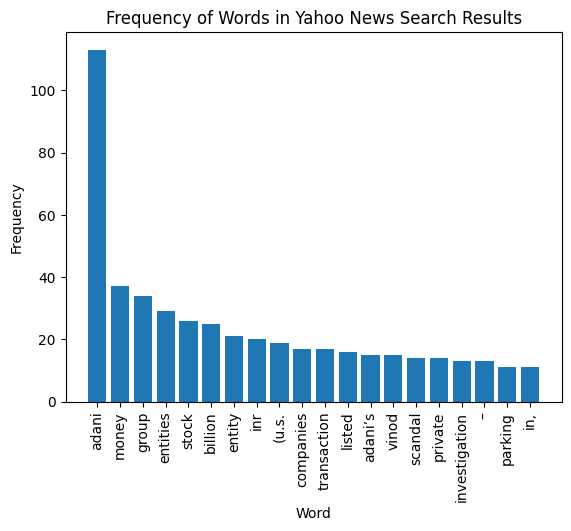

In [55]:
text = " ".join(df["title"].tolist() + df_1["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
search_term = input("Enter a search term: ")
# Get user input for the URL
url = f'https://hindenburgresearch.com/{search_term}'
response = requests.get(url)
# Send a GET request to the URL and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract all headers and their related paragraphs
headers = {}
current_header = None
for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
    if element.name.startswith('h'):
        # If a new header is found, update the current header
        current_header = element.text.strip()
        headers[current_header] = []
    elif current_header is not None:
        # If a paragraph is found, add it to the list of paragraphs for the current header
        headers[current_header].append(element.text.strip())

# Create a list of dictionaries with the title, summary and source information
data = []
for header, paragraphs in headers.items():
    data.append({
        'title': header,
        'summary': ' '.join(paragraphs),
        'source': url
    })

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)

# Print the dataframe
print(df)


Enter a search term: adani
                                                 title  \
0    Adani Group: How The World’s 3rd Richest Man I...   
1       GET OUR LATEST REPORTS DELIVERED TO YOUR INBOX   
2                                         Introduction   
3    Background On Adani Group, One Of India’s Larg...   
4    The 7 Listed Companies Of Adani Group Are 85%+...   
..                                                 ...   
136  Adani Group “Harasses” Critics And “Manipulate...   
137               Conclusion: Growth With Transparency   
138  Appendix 1: Vinod Adani’s Involvement in At Le...   
139  Disclosure: We Are Short Adani Group Through U...   
140                                   Legal Disclaimer   

                                               summary  \
0                                                        
1    Initial Disclosure: After extensive research, ...   
2    India is home to many of the world’s most bril...   
3    Adani Group is the 2nd largest conglome

In [48]:
df

title  \
0    Adani Group: How The World’s 3rd Richest Man I...   
1       GET OUR LATEST REPORTS DELIVERED TO YOUR INBOX   
2                                         Introduction   
3    Background On Adani Group, One Of India’s Larg...   
4    The 7 Listed Companies Of Adani Group Are 85%+...   
..                                                 ...   
136  Adani Group “Harasses” Critics And “Manipulate...   
137               Conclusion: Growth With Transparency   
138  Appendix 1: Vinod Adani’s Involvement in At Le...   
139  Disclosure: We Are Short Adani Group Through U...   
140                                   Legal Disclaimer   

                                               summary  \
0                                                        
1    Initial Disclosure: After extensive research, ...   
2    India is home to many of the world’s most bril...   
3    Adani Group is the 2nd largest conglomerate in...   
4    Even before examining the evidence put forward...   
..                                                 ...   
136  The Adani Group started a series of libel acti...   
137  A system is broken when corporate behemoths li...   
138  After cataloguing the entire Mauritius corpora...   
139                                                      
140  We hold short positions in Adani Group Compani...   

                                   source  
0    https://hindenburgresearch.com/adani  
1    https://hindenburgresearch.com/adani  
2    https://hindenburgresearch.com/adani  
3    https://hindenburgresearch.com/adani  
4    https://hindenburgresearch.com/adani  
..                                    ...  
136  https://hindenburgresearch.com/adani  
137  https://hindenburgresearch.com/adani  
138  https://hindenburgresearch.com/adani  
139  https://hindenburgresearch.com/adani  
140  https://hindenburgresearch.com/adani  

[141 rows x 3 columns]

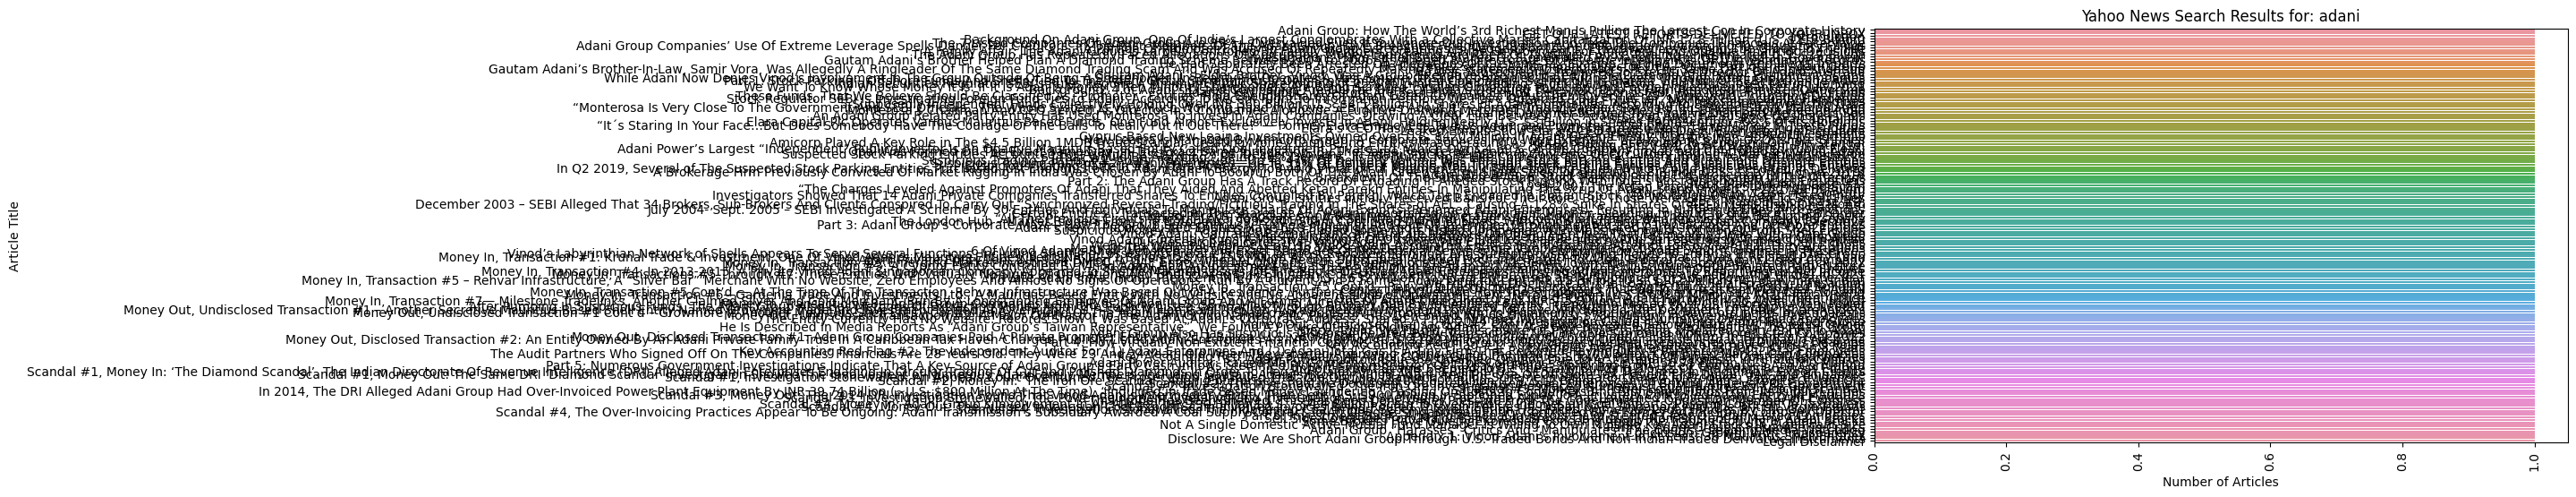

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()

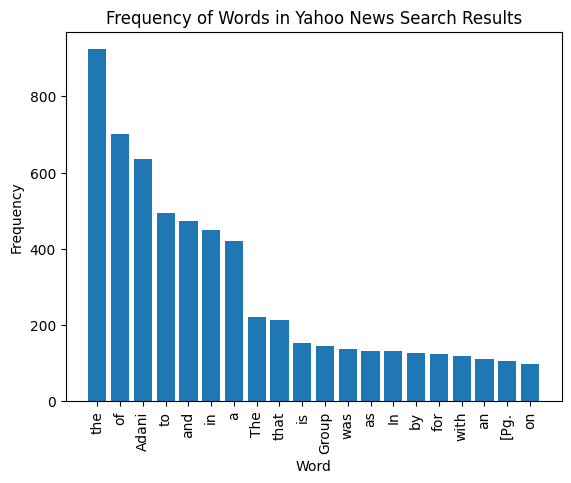

In [50]:
text = " ".join(df["title"].tolist() + df["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

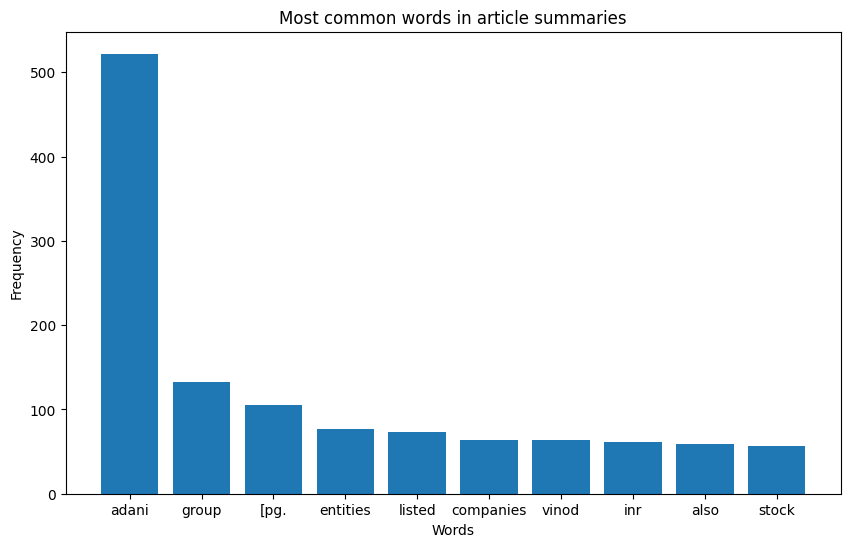

In [51]:
df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['summary'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

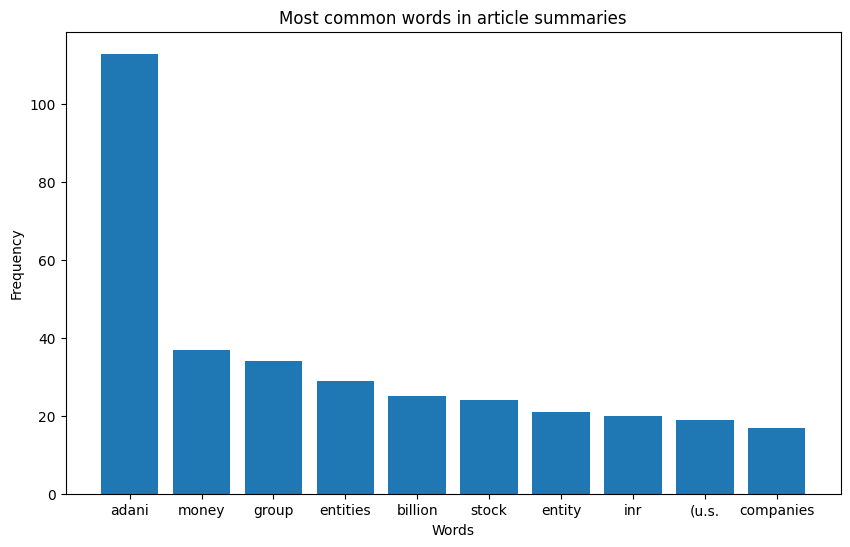

In [52]:
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['title'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [56]:
df_1

title  \
0  Adani Enterprises share price surges 1% today ...   
1  Adani Power Q4 FY23 results: Net profit soars ...   
2  Adani power Q4 results: Net profit rises 12.9 ...   
3  28% less earlier guidance: Adani flagship lowe...   
4  MSCI mark free float two Adani group companies...   
5  Adani Power Q4 profit grows 13 per cent Rs 5,2...   
6  MSCI slashes free float 2 Adani firms, here's ...   
7          MSCI lower free float two Adani companies   
8  Adani Ports shares rise monthly cargo volume h...   
9  Adani Green Energy announces FY23 results repo...   

                                             summary      source  
0  Adani Enterprises shares risen 13% past one mo...  Yahoo News  
1  regulatory filing, company said consolidated t...  Yahoo News  
2  Adani Power reported 12.9 percent rise net pro...  Yahoo News  
3  Adani’s transportation vertical comprising air...  Yahoo News  
4  MSCI assesses Adani Total Gas' free float 14 p...  Yahoo News  
5  Q4 FY23, APL achieved average consolidated PLF...  Yahoo News  
6  battling stock market rout triggered Hindenbur...  Yahoo News  
7  (Reuters) - MSCI lower free float two India's ...  Yahoo News  
8  Adani Ports: commissioning Western Dedicated F...  Yahoo News  
9  Adani Green Energy announces FY23 results repo...  Yahoo News

In [57]:
df

title  \
0    adani group: world’s 3rd richest man pulling l...   
1                   get latest reports delivered inbox   
2                                         introduction   
3    background adani group, one india’s largest co...   
4    7 listed companies adani group 85%+ overvalued...   
..                                                 ...   
136  adani group “harasses” critics “manipulates” c...   
137                    conclusion: growth transparency   
138  appendix 1: vinod adani’s involvement least 38...   
139  disclosure: short adani group u.s.-traded bond...   
140                                   legal disclaimer   

                                               summary  \
0                                                        
1    initial disclosure: extensive research, taken ...   
2    india home many world’s brilliant entrepreneur...   
3    adani group 2nd largest conglomerate india, ru...   
4    even examining evidence put forward report bas...   
..                                                 ...   
136  adani group started series libel actions 2017,...   
137  system broken corporate behemoths like adani g...   
138  cataloguing entire mauritius corporate registr...   
139                                                      
140  hold short positions adani group companies u.s...   

                                   source  
0    https://hindenburgresearch.com/adani  
1    https://hindenburgresearch.com/adani  
2    https://hindenburgresearch.com/adani  
3    https://hindenburgresearch.com/adani  
4    https://hindenburgresearch.com/adani  
..                                    ...  
136  https://hindenburgresearch.com/adani  
137  https://hindenburgresearch.com/adani  
138  https://hindenburgresearch.com/adani  
139  https://hindenburgresearch.com/adani  
140  https://hindenburgresearch.com/adani  

[141 rows x 3 columns]

In [59]:
result = pd.concat([df_1, df], ignore_index=True)

In [60]:
result.head()

title  \
0  Adani Enterprises share price surges 1% today ...   
1  Adani Power Q4 FY23 results: Net profit soars ...   
2  Adani power Q4 results: Net profit rises 12.9 ...   
3  28% less earlier guidance: Adani flagship lowe...   
4  MSCI mark free float two Adani group companies...   

                                             summary      source  
0  Adani Enterprises shares risen 13% past one mo...  Yahoo News  
1  regulatory filing, company said consolidated t...  Yahoo News  
2  Adani Power reported 12.9 percent rise net pro...  Yahoo News  
3  Adani’s transportation vertical comprising air...  Yahoo News  
4  MSCI assesses Adani Total Gas' free float 14 p...  Yahoo News

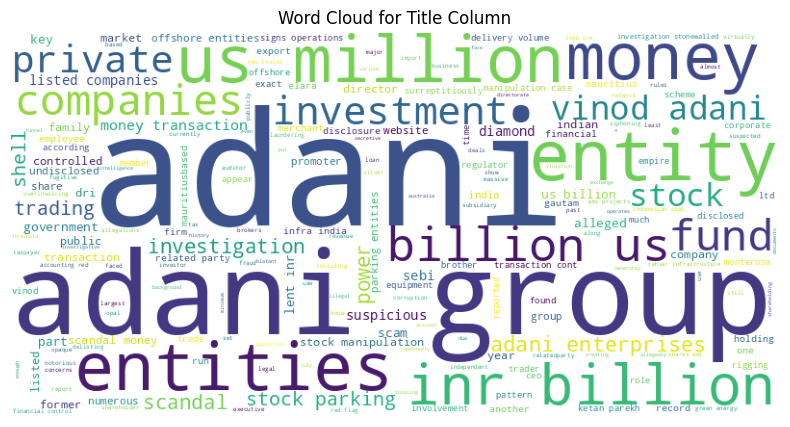

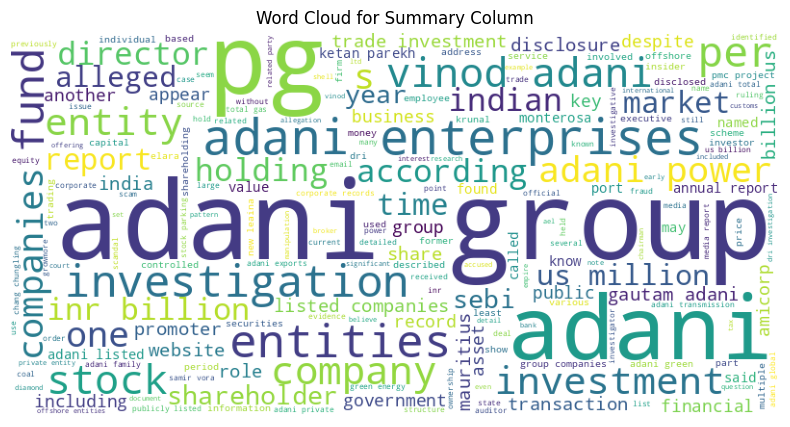

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine the 'title' and 'summary' columns into one
text = ' '.join(result['title']) + ' ' + ' '.join(result['summary'])

# Generate a word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud for the title column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'])))
plt.axis('off')
plt.title('Word Cloud for Title Column')
plt.show()

# Plot the word cloud for the summary column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary'])))
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

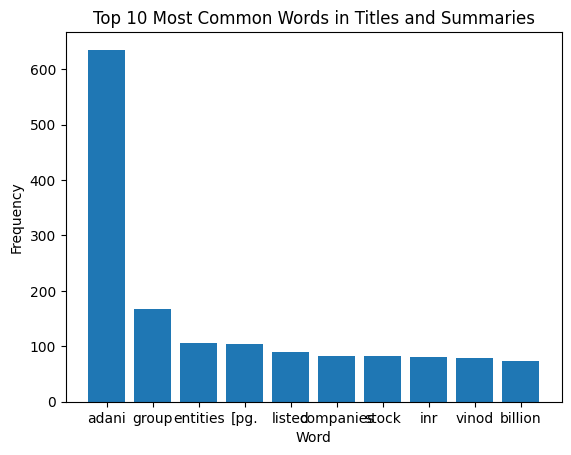

In [86]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title'].tolist() + result['summary'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


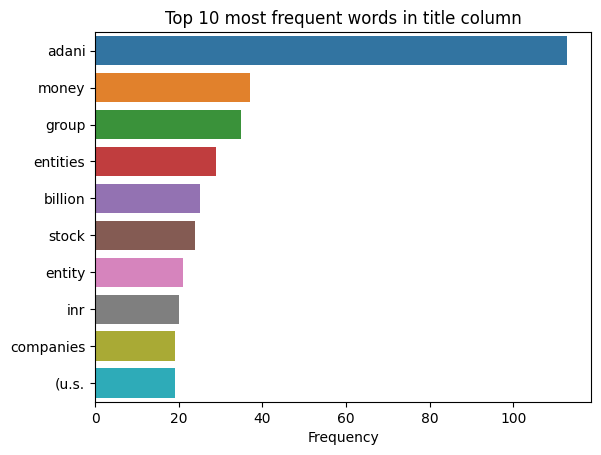

In [87]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [88]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get stop words and set up punctuation filter
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
extra_symbols = set(['‘', '’', '“', '”', '’s', '’t', '—', '–', '...'])

# Remove stop words and extra symbols from title column
result['title_clean'] = result['title'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))

# Remove stop words and extra symbols from summary column
result['summary_clean'] = result['summary'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))


In [89]:
result

title  \
0    Adani Enterprises share price surges 1% today ...   
1    Adani Power Q4 FY23 results: Net profit soars ...   
2    Adani power Q4 results: Net profit rises 12.9 ...   
3    28% less earlier guidance: Adani flagship lowe...   
4    MSCI mark free float two Adani group companies...   
..                                                 ...   
146  adani group “harasses” critics “manipulates” c...   
147                    conclusion: growth transparency   
148  appendix 1: vinod adani’s involvement least 38...   
149  disclosure: short adani group u.s.-traded bond...   
150                                   legal disclaimer   

                                               summary  \
0    Adani Enterprises shares risen 13% past one mo...   
1    regulatory filing, company said consolidated t...   
2    Adani Power reported 12.9 percent rise net pro...   
3    Adani’s transportation vertical comprising air...   
4    MSCI assesses Adani Total Gas' free float 14 p...   
..                                                 ...   
146  adani group started series libel actions 2017,...   
147  system broken corporate behemoths like adani g...   
148  cataloguing entire mauritius corporate registr...   
149                                                      
150  hold short positions adani group companies u.s...   

                                   source  \
0                              Yahoo News   
1                              Yahoo News   
2                              Yahoo News   
3                              Yahoo News   
4                              Yahoo News   
..                                    ...   
146  https://hindenburgresearch.com/adani   
147  https://hindenburgresearch.com/adani   
148  https://hindenburgresearch.com/adani   
149  https://hindenburgresearch.com/adani   
150  https://hindenburgresearch.com/adani   

                                           title_clean  \
0    adani enterprises share price surges 1 today q...   
1    adani power q4 fy23 results net profit soars r...   
2    adani power q4 results net profit rises 12.9 p...   
3    28 less earlier guidance adani flagship lowers...   
4    msci mark free float two adani group companies...   
..                                                 ...   
146  adani group harasses critics manipulates court...   
147                     conclusion growth transparency   
148  appendix 1 vinod adani involvement least 38 ma...   
149  disclosure short adani group u.s.-traded bonds...   
150                                   legal disclaimer   

                                         summary_clean  
0    adani enterprises shares risen 13 past one mon...  
1    regulatory filing company said consolidated to...  
2    adani power reported 12.9 percent rise net pro...  
3    adani transportation vertical comprising airpo...  
4    msci assesses adani total gas free float 14 pe...  
..                                                 ...  
146  adani group started series libel actions 2017 ...  
147  system broken corporate behemoths like adani g...  
148  cataloguing entire mauritius corporate registr...  
149                                                     
150  hold short positions adani group companies u.s...  

[151 rows x 5 columns]

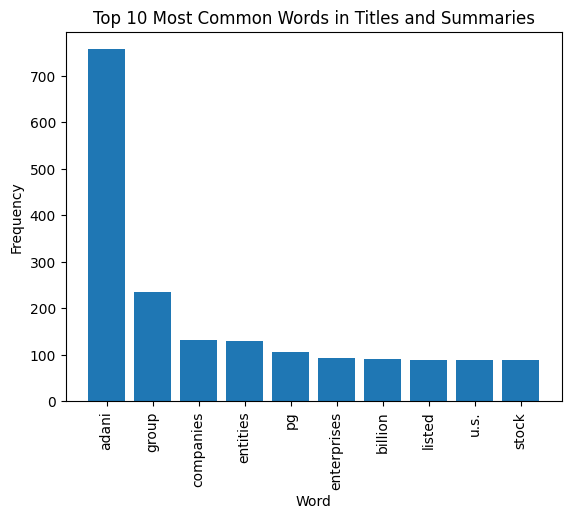

In [90]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title_clean'].tolist() + result['summary_clean'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


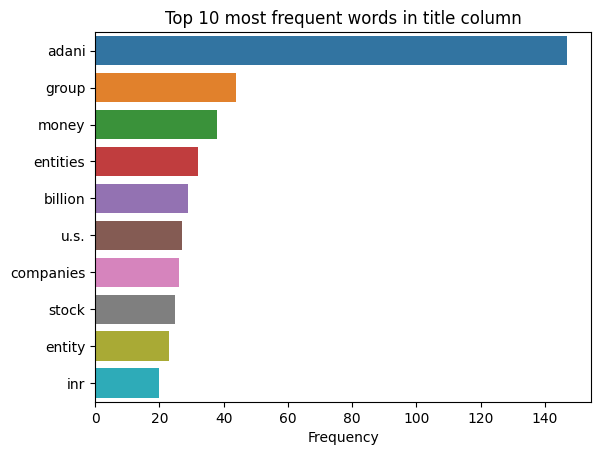

In [91]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


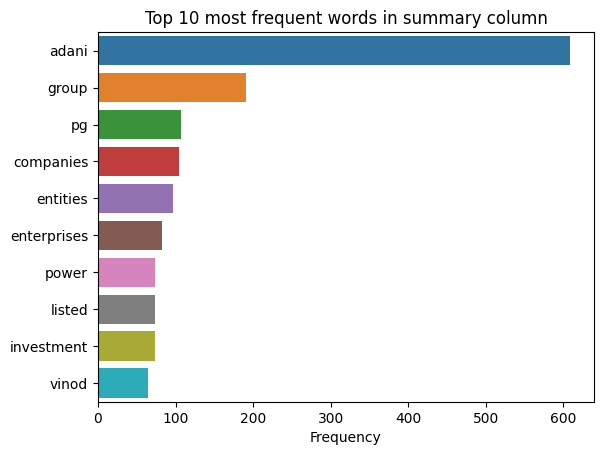

In [92]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_summary_words = [word for title in result['summary_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_summary_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in summary column')
plt.xlabel('Frequency')
plt.show()


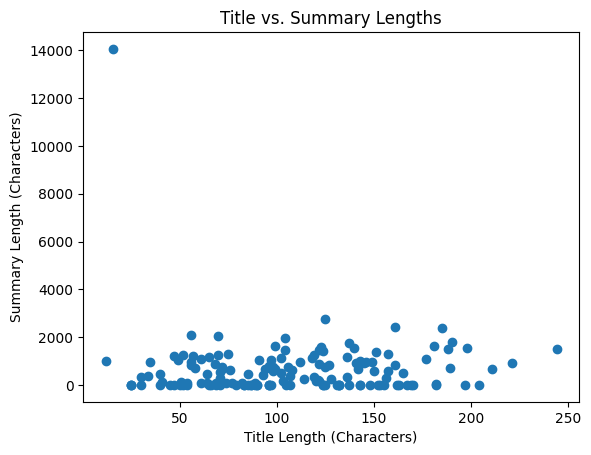

In [93]:
import matplotlib.pyplot as plt

title_lengths = result['title_clean'].str.len()
summary_lengths = result['summary_clean'].str.len()

fig, ax = plt.subplots()
ax.scatter(title_lengths, summary_lengths)
plt.title('Title vs. Summary Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Summary Length (Characters)')
plt.show()


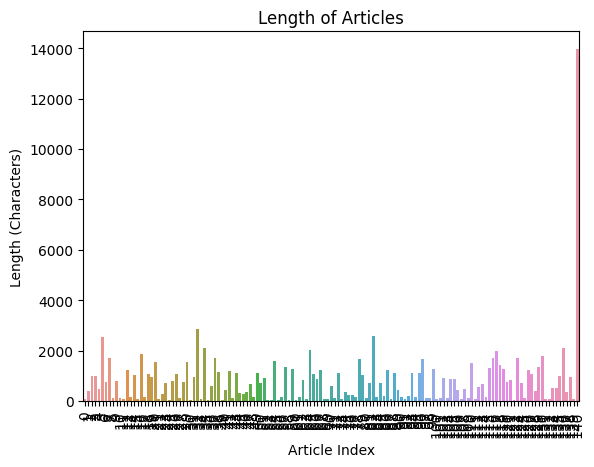

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

result['length'] = result['title_clean'].str.len() + result['summary_clean'].str.len()
sns.barplot(x=df.index, y='length', data=df)
plt.title('Length of Articles')
plt.xlabel('Article Index')
plt.xticks(rotation=90)
plt.ylabel('Length (Characters)')
plt.show()


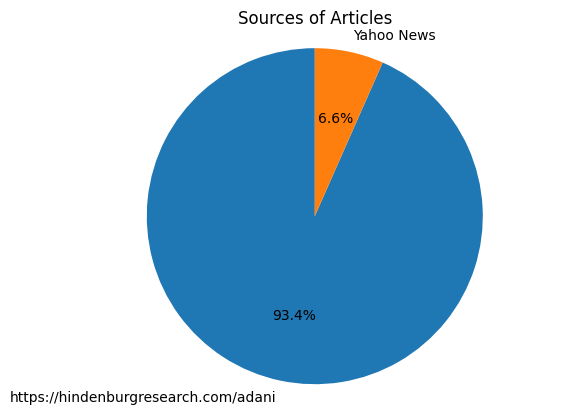

In [95]:
import matplotlib.pyplot as plt

source_counts = result['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sources of Articles')
plt.show()


In [96]:
result.head()

title  \
0  Adani Enterprises share price surges 1% today ...   
1  Adani Power Q4 FY23 results: Net profit soars ...   
2  Adani power Q4 results: Net profit rises 12.9 ...   
3  28% less earlier guidance: Adani flagship lowe...   
4  MSCI mark free float two Adani group companies...   

                                             summary      source  \
0  Adani Enterprises shares risen 13% past one mo...  Yahoo News   
1  regulatory filing, company said consolidated t...  Yahoo News   
2  Adani Power reported 12.9 percent rise net pro...  Yahoo News   
3  Adani’s transportation vertical comprising air...  Yahoo News   
4  MSCI assesses Adani Total Gas' free float 14 p...  Yahoo News   

                                         title_clean  \
0  adani enterprises share price surges 1 today q...   
1  adani power q4 fy23 results net profit soars r...   
2  adani power q4 results net profit rises 12.9 p...   
3  28 less earlier guidance adani flagship lowers...   
4  msci mark free float two adani group companies...   

                                       summary_clean  length  
0  adani enterprises shares risen 13 past one mon...     138  
1  regulatory filing company said consolidated to...     165  
2  adani power reported 12.9 percent rise net pro...     156  
3  adani transportation vertical comprising airpo...     142  
4  msci assesses adani total gas free float 14 pe...     131

In [97]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [98]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores


In [99]:
df['title_sentiment'] = df['title_clean'].apply(get_sentiment_scores)
df['summary_sentiment'] = df['summary_clean'].apply(get_sentiment_scores)

In [100]:
title_sentiment_avg = df['title_sentiment'].apply(lambda x: x['compound']).mean()
summary_sentiment_avg = df['summary_sentiment'].apply(lambda x: x['compound']).mean()

print("Title sentiment average:", title_sentiment_avg)
print("Summary sentiment average:", summary_sentiment_avg)


Title sentiment average: -0.0703531914893617
Summary sentiment average: 0.11907659574468085
